## Decision Trees and Random Forest

### Importing all The required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

### Reading The file from the local disk

In [3]:
data= pd.read_csv('C:\\Users\\Larry Williams\\Desktop\\Mamata\\Edvancer\\data\\data\\Customer_Churn.csv')

### Discarding all unwanted columns

In [4]:
data.drop(["customerID"],axis=1,inplace=True)

### DataTypes conversion

In [5]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
data["TotalCharges"]=data["TotalCharges"].replace("[^0-9,.]","",regex=True)
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

### Performing one hot encoding

In [9]:
data=pd.get_dummies(data,drop_first=True)
data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


### Dropping null values

In [11]:
data.dropna(axis=0,how="any",inplace=True)

### Building the model with Decision Tree Classifier

In [12]:
a=data.drop(["Churn_Yes"],axis=1)
b=data["Churn_Yes"]

In [13]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.2,random_state=123)

In [14]:
dt=DecisionTreeClassifier(max_depth=8,min_samples_leaf=10,max_leaf_nodes=5,random_state=123)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [15]:
pred=dt.predict(x_test)

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

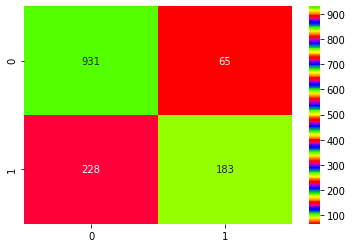

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt=".0f",cmap="prism")

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       996
           1       0.74      0.45      0.56       411

    accuracy                           0.79      1407
   macro avg       0.77      0.69      0.71      1407
weighted avg       0.78      0.79      0.77      1407



### Visuvalizing the tree

[Text(372.0, 475.65000000000003, 'tenure <= 17.5\ngini = 0.384\nsamples = 5625\nvalue = [4167, 1458]'),
 Text(186.0, 339.75, 'InternetService_Fiber optic <= 0.5\ngini = 0.493\nsamples = 2077\nvalue = [1159, 918]'),
 Text(93.0, 203.85000000000002, 'gini = 0.407\nsamples = 1197\nvalue = [857, 340]'),
 Text(279.0, 203.85000000000002, 'gini = 0.451\nsamples = 880\nvalue = [302, 578]'),
 Text(558.0, 339.75, 'InternetService_Fiber optic <= 0.5\ngini = 0.258\nsamples = 3548\nvalue = [3008, 540]'),
 Text(465.0, 203.85000000000002, 'gini = 0.11\nsamples = 1951\nvalue = [1837, 114]'),
 Text(651.0, 203.85000000000002, 'tenure <= 55.5\ngini = 0.391\nsamples = 1597\nvalue = [1171, 426]'),
 Text(558.0, 67.94999999999999, 'gini = 0.458\nsamples = 956\nvalue = [617, 339]'),
 Text(744.0, 67.94999999999999, 'gini = 0.235\nsamples = 641\nvalue = [554, 87]')]

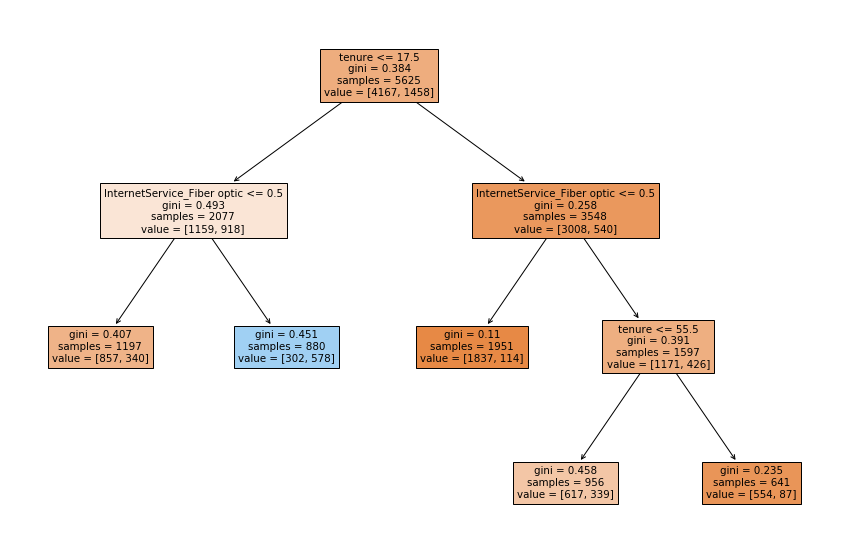

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(15,10))
plot_tree(dt,feature_names=x_train.columns,max_depth=3,filled=True)

### Building the model with Random Forest Classifier

In [21]:
rf=RandomForestClassifier(n_estimators=200,max_depth=12,max_features=6,max_leaf_nodes=20,random_state=123)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features=6,
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [22]:
pred1=rf.predict(x_test)

In [23]:
print(confusion_matrix(y_test,pred1))

[[920  76]
 [208 203]]


In [24]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       996
           1       0.73      0.49      0.59       411

    accuracy                           0.80      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Performing Cross Validation in order to check the best model

In [26]:
from sklearn.model_selection import KFold,cross_val_score
k=KFold(n_splits=5,shuffle=True)

In [28]:
for train,test in k.split(data) :
    print("train set")
    print(train)
    print("test set")
    print(test)

train set
[   0    2    3 ... 7029 7030 7031]
test set
[   1    6   17 ... 7022 7024 7028]
train set
[   0    1    4 ... 7027 7028 7030]
test set
[   2    3   11 ... 7025 7029 7031]
train set
[   1    2    3 ... 7029 7030 7031]
test set
[   0    4    8 ... 6993 6996 7012]
train set
[   0    1    2 ... 7029 7030 7031]
test set
[   5    7   12 ... 7008 7010 7026]
train set
[   0    1    2 ... 7028 7029 7031]
test set
[   9   14   32 ... 7023 7027 7030]


In [29]:
k1=cross_val_score(dt,a,b,cv=5)
k1.mean()

0.7898161094547583

In [30]:
k2=cross_val_score(rf,a,b,cv=5)
k2.mean()

0.7987750740303765

### Feature Importance

In [34]:
a=dict(zip(data.columns.values,rf.feature_importances_))
a

{'SeniorCitizen': 0.004613102264738536,
 'tenure': 0.24360695999309465,
 'MonthlyCharges': 0.07276985315047607,
 'TotalCharges': 0.14031948426398042,
 'gender_Male': 0.0011137631172488274,
 'Partner_Yes': 0.004762942485923516,
 'Dependents_Yes': 0.0025235289802619247,
 'PhoneService_Yes': 0.0014385148215285879,
 'MultipleLines_No phone service': 0.0009334105995272267,
 'MultipleLines_Yes': 0.005506074137850425,
 'InternetService_Fiber optic': 0.11626146547011133,
 'InternetService_No': 0.016855853105345774,
 'OnlineSecurity_No internet service': 0.018955749368639512,
 'OnlineSecurity_Yes': 0.03326071925993877,
 'OnlineBackup_No internet service': 0.017294227749770213,
 'OnlineBackup_Yes': 0.00771467571357832,
 'DeviceProtection_No internet service': 0.020781174830297205,
 'DeviceProtection_Yes': 0.0013713166397911261,
 'TechSupport_No internet service': 0.01847417963366334,
 'TechSupport_Yes': 0.01535360600636468,
 'StreamingTV_No internet service': 0.014481052953501798,
 'StreamingTV_

### Visuvalize the Feature Importance

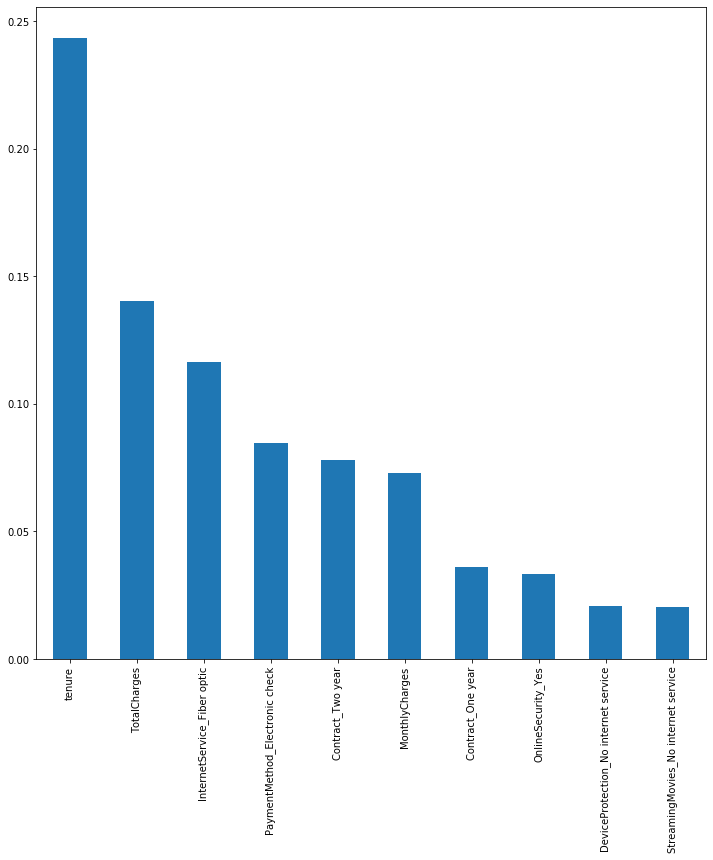

In [38]:
plt.figure(figsize=(12,12))
rf1=pd.Series(rf.feature_importances_,index=x_train.columns)
rf1.nlargest(10).plot(kind="bar")

### Again building the Random Forest model by taking the top 10 Important Features

In [40]:
d=data[["tenure","TotalCharges","InternetService_Fiber optic","PaymentMethod_Electronic check","Contract_Two year","MonthlyCharges","Contract_One year","OnlineSecurity_Yes","DeviceProtection_No internet service","StreamingMovies_No internet service"]]

In [42]:
y=data["Churn_Yes"]

In [43]:
rf1=RandomForestClassifier(n_estimators=200,max_depth=8,max_features=6,max_leaf_nodes=15,random_state=123)

In [44]:
x_train,x_test,y_train,y_test=train_test_split(d,y,test_size=0.2,random_state=123)
rf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=6,
                       max_leaf_nodes=15, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [45]:
pred2=rf1.predict(x_test)

In [46]:
print(confusion_matrix(y_test,pred2))

[[905  91]
 [198 213]]


In [47]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       996
           1       0.70      0.52      0.60       411

    accuracy                           0.79      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.79      0.78      1407



### Recursive feature elimination with cross validation

In [48]:
from sklearn.feature_selection import RFECV

In [49]:
rf3=RandomForestClassifier()
rf4=RFECV(estimator=rf3,step=2,cv=5,scoring="accuracy")

In [50]:
rf5=rf4.fit(x_train,y_train)
print("Optimal Features are:",rf5.n_features_)
print("Best Features are:",x_train.columns[rf5.support_])

Optimal Features are: 10
Best Features are: Index(['tenure', 'TotalCharges', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'Contract_Two year', 'MonthlyCharges',
       'Contract_One year', 'OnlineSecurity_Yes',
       'DeviceProtection_No internet service',
       'StreamingMovies_No internet service'],
      dtype='object')


### Grid Search CV

In [51]:
from sklearn.model_selection import GridSearchCV
r=RandomForestClassifier()

In [53]:
params={
    "n_estimators":[100,200],
    "max_depth":[4,8],
    "max_features":[4,5],

}

In [54]:
gs=GridSearchCV(estimator=r,cv=5,scoring="accuracy",param_grid=params)

In [55]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [56]:
gs.best_params_

{'max_depth': 8, 'max_features': 4, 'n_estimators': 200}

In [57]:
a=gs.best_score_
print(round(a,2))

0.8
